In [1]:
# preparing package, object, and library
import pandas as pd
import numpy as np 

In [2]:
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
# 1. normalization 
from sklearn.preprocessing import MinMaxScaler

In [3]:
X_train1, X_test1, y_train1,y_test1 = np.load('X_train1.npy'),np.load('X_test1.npy'),np.load('y_train1.npy'),np.load('y_test1.npy')
X_train2, X_test2, y_train2,y_test2 = np.load('X_train2.npy'),np.load('X_test2.npy'),np.load('y_train2.npy'),np.load('y_test2.npy')
X_train3, X_test3, y_train3,y_test3 = np.load('X_train3.npy'),np.load('X_test3.npy'),np.load('y_train3.npy'),np.load('y_test3.npy')
X_train4, X_test4, y_train4,y_test4 = np.load('X_train4.npy'),np.load('X_test4.npy'),np.load('y_train4.npy'),np.load('y_test4.npy')

scaler = MinMaxScaler()
scaler.fit(X_train1)
X_normal1 = scaler.transform(X_train1)
scaler.fit(X_train2)
X_normal2 = scaler.transform(X_train2)
scaler.fit(X_train3)
X_normal3 = scaler.transform(X_train3)
scaler.fit(X_train4)
X_normal4 = scaler.transform(X_train4)

In [4]:
def get_bad_features(pValue,thr):
    list_bad_feature=[]
    for i in range(len(pValue)):
        if pValue[i] < thr:
            list_bad_feature.append(i)
    return list_bad_feature

%run ./best_featureRNA.ipynb 
%run ./Data_Conversion_1.ipynb
%run ./ML_Module_v1.ipynb
%run ./Performances_Module_1.ipynb
%run ./Data_Visualization_1.ipynb

In [5]:
thr = 0.89
nCV =10
f_score1 = chi2(X_normal1,y_train1)
f_score2 = chi2(X_normal2,y_train2)
f_score3 = chi2(X_normal3,y_train3)
f_score4 = chi2(X_normal4,y_train4)

pValue1 = pd.Series(f_score1[1])
pValue2 = pd.Series(f_score2[1])
pValue3 = pd.Series(f_score3[1])
pValue4 = pd.Series(f_score4[1])
        
list_bad_feature1 = get_bad_features(pValue1,thr)
list_bad_feature2 = get_bad_features(pValue2,thr)
list_bad_feature3 = get_bad_features(pValue3,thr)
list_bad_feature4 = get_bad_features(pValue4,thr)
    
    # reset X_train and X_test , remove the bad feature from dataset 
X_train11 = np.delete(X_train1, list_bad_feature1, axis=1)
X_train21 = np.delete(X_train2, list_bad_feature2, axis=1)
X_train31 = np.delete(X_train3, list_bad_feature3, axis=1)
X_train41 = np.delete(X_train4, list_bad_feature4, axis=1)
    
print(X_train11.shape)
print(X_train21.shape)
print(X_train31.shape)
print(X_train41.shape)

X_test11 = np.delete(X_test1, list_bad_feature1, axis=1)
X_test21 = np.delete(X_test2, list_bad_feature2, axis=1)
X_test31 = np.delete(X_test3, list_bad_feature3, axis=1)
X_test41 = np.delete(X_test4, list_bad_feature4, axis=1)
    
y_train11 = np.array(y_train1)
y_test11 = np.array(y_test1)
y_train21 = np.array(y_train2)
y_test21 = np.array(y_test2)
y_train31 = np.array(y_train3)
y_test31 = np.array(y_test3)
y_train41 = np.array(y_train4)
y_test41 = np.array(y_test4)

tt_data1,tt_targets1,tv_data1,tv_targets1 = CF_Validation(nCV,X_train11,y_train11)
t_vec_train1,t_vec_val1 = get_vec_data(tt_data1,tt_targets1,nCV), get_vec_data(tv_data1,tv_targets1,nCV)
t_vec_test1= [X_test11,y_test11]

tt_data2,tt_targets2,tv_data2,tv_targets2 = CF_Validation(nCV,X_train21,y_train21)
t_vec_train2,t_vec_val2 = get_vec_data(tt_data2,tt_targets2,nCV), get_vec_data(tv_data2,tv_targets2,nCV)
t_vec_test2= [X_test21,y_test21]

tt_data3,tt_targets3,tv_data3,tv_targets3 = CF_Validation(nCV,X_train31,y_train31)
t_vec_train3,t_vec_val3 = get_vec_data(tt_data3,tt_targets3,nCV), get_vec_data(tv_data3,tv_targets3,nCV)
t_vec_test3= [X_test31,y_test31]

tt_data4,tt_targets4,tv_data4,tv_targets4 = CF_Validation(nCV,X_train41,y_train41)
t_vec_train4,t_vec_val4 = get_vec_data(tt_data4,tt_targets4,nCV), get_vec_data(tv_data4,tv_targets4,nCV)
t_vec_test4= [X_test41,y_test41]

(1191, 17)
(1191, 21)
(1191, 18)
(1191, 28)


In [6]:
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =Run_ML(nCV,t_vec_train1,t_vec_val1,t_vec_test1,'AB1')
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2 =Run_ML(nCV,t_vec_train2,t_vec_val2,t_vec_test2,'AB2')
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3 =Run_ML(nCV,t_vec_train3,t_vec_val3,t_vec_test3,'AB3')
total_y_pred_train4,total_y_true_train4,total_y_pred_test4,total_y_true_test4 =Run_ML(nCV,t_vec_train4,t_vec_val4,t_vec_test4,'AB4')

AB_total_performances_train1,AB_total_performances_test1 = Total_Performances(nCV, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
AB_total_performances_train2,AB_total_performances_test2 = Total_Performances(nCV, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
AB_total_performances_train3,AB_total_performances_test3 = Total_Performances(nCV, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)
AB_total_performances_train4,AB_total_performances_test4 = Total_Performances(nCV, total_y_pred_train4,total_y_true_train4,
                                                                         total_y_pred_test4,total_y_true_test4)

In [7]:
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =Run_ML(nCV,t_vec_train1,t_vec_val1,t_vec_test1,'GB1')
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2 =Run_ML(nCV,t_vec_train2,t_vec_val2,t_vec_test2,'GB2')
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3 =Run_ML(nCV,t_vec_train3,t_vec_val3,t_vec_test3,'GB3')
total_y_pred_train4,total_y_true_train4,total_y_pred_test4,total_y_true_test4 =Run_ML(nCV,t_vec_train4,t_vec_val4,t_vec_test4,'GB4')

GB_total_performances_train1,GB_total_performances_test1 = Total_Performances(nCV, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
GB_total_performances_train2,GB_total_performances_test2 = Total_Performances(nCV, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
GB_total_performances_train3,GB_total_performances_test3 = Total_Performances(nCV, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)
GB_total_performances_train4,GB_total_performances_test4 = Total_Performances(nCV, total_y_pred_train4,total_y_true_train4,
                                                                         total_y_pred_test4,total_y_true_test4)



In [8]:
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =Run_ML(nCV,t_vec_train1,t_vec_val1,t_vec_test1,'RF1')
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2 =Run_ML(nCV,t_vec_train2,t_vec_val2,t_vec_test2,'RF2')
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3 =Run_ML(nCV,t_vec_train3,t_vec_val3,t_vec_test3,'RF3')
total_y_pred_train4,total_y_true_train4,total_y_pred_test4,total_y_true_test4 =Run_ML(nCV,t_vec_train4,t_vec_val4,t_vec_test4,'RF4')

RF_total_performances_train1,RF_total_performances_test1 = Total_Performances(nCV, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
RF_total_performances_train2,RF_total_performances_test2 = Total_Performances(nCV, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
RF_total_performances_train3,RF_total_performances_test3 = Total_Performances(nCV, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)
RF_total_performances_train4,RF_total_performances_test4 = Total_Performances(nCV, total_y_pred_train4,total_y_true_train4,
                                                                         total_y_pred_test4,total_y_true_test4)

In [9]:
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =Run_ML(nCV,t_vec_train1,t_vec_val1,t_vec_test1,'XGB1')
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2 =Run_ML(nCV,t_vec_train2,t_vec_val2,t_vec_test2,'XGB2')
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3 =Run_ML(nCV,t_vec_train3,t_vec_val3,t_vec_test3,'XGB3')
total_y_pred_train4,total_y_true_train4,total_y_pred_test4,total_y_true_test4 =Run_ML(nCV,t_vec_train4,t_vec_val4,t_vec_test4,'XGB4')

XGB_total_performances_train1,XGB_total_performances_test1 = Total_Performances(nCV, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
XGB_total_performances_train2,XGB_total_performances_test2 = Total_Performances(nCV, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
XGB_total_performances_train3,XGB_total_performances_test3 = Total_Performances(nCV, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)
XGB_total_performances_train4,XGB_total_performances_test4 = Total_Performances(nCV, total_y_pred_train4,total_y_true_train4,
                                                                         total_y_pred_test4,total_y_true_test4)

In [11]:
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =Run_ML(nCV,t_vec_train1,t_vec_val1,t_vec_test1,'Stacked1')
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2 =Run_ML(nCV,t_vec_train2,t_vec_val2,t_vec_test2,'Stacked2')
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3 =Run_ML(nCV,t_vec_train3,t_vec_val3,t_vec_test3,'Stacked3')
total_y_pred_train4,total_y_true_train4,total_y_pred_test4,total_y_true_test4 =Run_ML(nCV,t_vec_train4,t_vec_val4,t_vec_test4,'Stacked4')

Stacking_total_performances_train1,Stacking_total_performances_test1 = Total_Performances(nCV, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
Stacking_total_performances_train2,Stacking_total_performances_test2 = Total_Performances(nCV, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
Stacking_total_performances_train3,Stacking_total_performances_test3 = Total_Performances(nCV, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)
Stacking_total_performances_train4,Stacking_total_performances_test4 = Total_Performances(nCV, total_y_pred_train4,total_y_true_train4,
                                                                         total_y_pred_test4,total_y_true_test4)

In [12]:
AB_tot_perf_train = [AB_total_performances_train1, AB_total_performances_train2, 
                     AB_total_performances_train3, AB_total_performances_train4]
AB_tot_perf_test = [AB_total_performances_test1, AB_total_performances_test2, 
                    AB_total_performances_test3, AB_total_performances_test4]
GB_tot_perf_train = [GB_total_performances_train1, GB_total_performances_train2, 
                     GB_total_performances_train3,GB_total_performances_train4]
GB_tot_perf_test = [GB_total_performances_test1, GB_total_performances_test2, 
                    GB_total_performances_test3,GB_total_performances_test4]
RF_tot_perf_train = [RF_total_performances_train1, RF_total_performances_train2,
                     RF_total_performances_train3,RF_total_performances_train4]
RF_tot_perf_test = [RF_total_performances_test1, RF_total_performances_test2, 
                    RF_total_performances_test3,RF_total_performances_test4]
XGB_tot_perf_train = [XGB_total_performances_train1, XGB_total_performances_train2, 
                      XGB_total_performances_train3,XGB_total_performances_train4]
XGB_tot_perf_test = [XGB_total_performances_test1,XGB_total_performances_test2, 
                     XGB_total_performances_test3,XGB_total_performances_test4]
Stacking_tot_perf_train = [Stacking_total_performances_train1, Stacking_total_performances_train2, 
                           Stacking_total_performances_train3,Stacking_total_performances_train4]
Stacking_tot_perf_test = [Stacking_total_performances_test1,Stacking_total_performances_test2, 
                          Stacking_total_performances_test3,Stacking_total_performances_test4]

Create_Tables_RNA_fusion(AB_tot_perf_train,AB_tot_perf_test, 'adaboost')
Create_Tables_RNA_fusion(GB_tot_perf_train,GB_tot_perf_test, 'gradientboost')
Create_Tables_RNA_fusion(RF_tot_perf_train,RF_tot_perf_test, 'random forest')
Create_Tables_RNA_fusion(XGB_tot_perf_train,XGB_tot_perf_test, 'extreme gradient boost')
Create_Tables_RNA_fusion(Stacking_tot_perf_train,Stacking_tot_perf_test, 'Stacking')

+-------------------+--------------+-------+-------+-------+-------+-------+
| mTrain Model Name |  Data Type   |  ACC  |   SN  |   SP  |  MCC  |  AUC  |
+-------------------+--------------+-------+-------+-------+-------+-------+
|      adaboost     | feature_new1 | 0.661 | 0.655 | 0.667 | 0.322 | 0.661 |
|      adaboost     | feature_new2 | 0.895 | 0.898 | 0.893 | 0.791 | 0.895 |
|      adaboost     | feature_new3 | 0.914 | 0.915 | 0.913 | 0.828 | 0.914 |
|      adaboost     | feature_new4 | 0.907 | 0.909 | 0.906 | 0.814 | 0.907 |
+-------------------+--------------+-------+-------+-------+-------+-------+
+------------------+--------------+-------+-------+-------+-------+-------+
| mTest Model Name |  Data Type   |  ACC  |   SN  |   SP  |  MCC  |  AUC  |
+------------------+--------------+-------+-------+-------+-------+-------+
|     adaboost     | feature_new1 | 0.504 | 0.478 |  0.53 | 0.008 | 0.504 |
|     adaboost     | feature_new2 | 0.871 |  0.8  | 0.944 | 0.752 | 0.872 |
|   

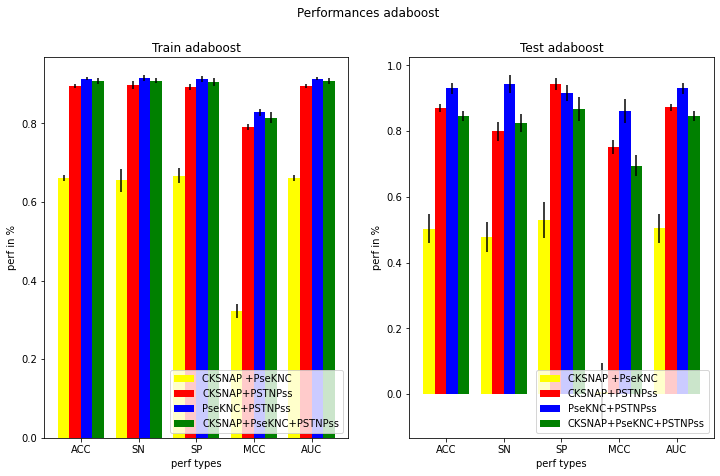

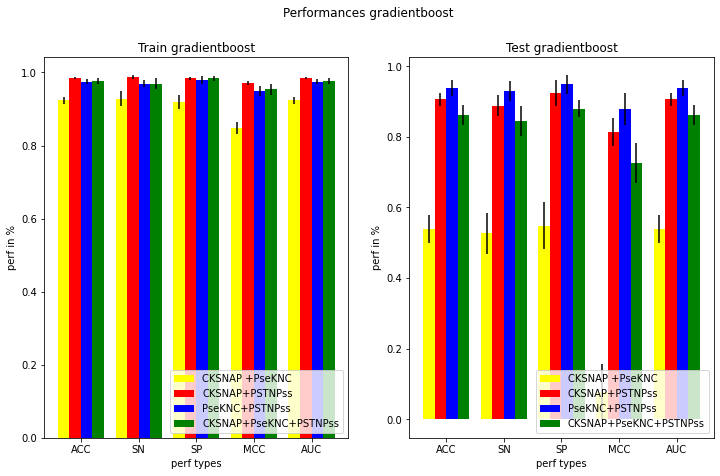

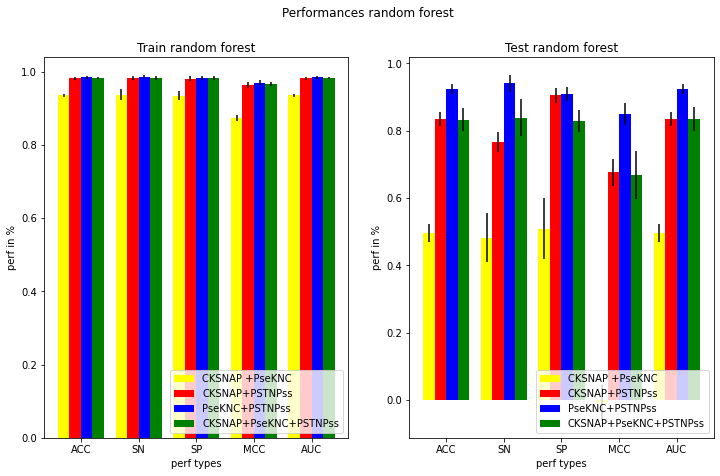

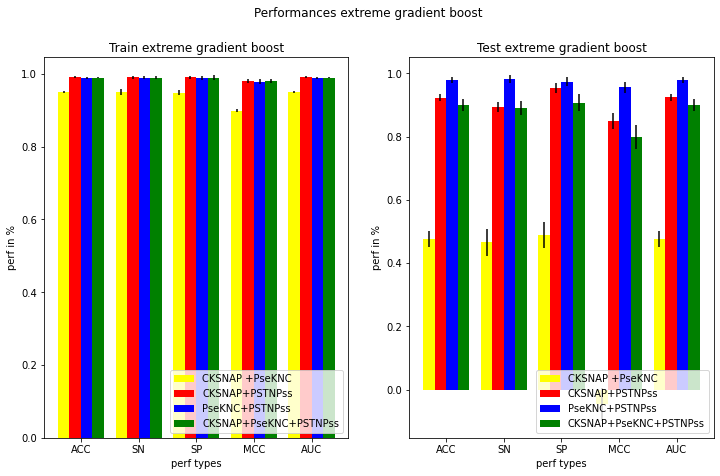

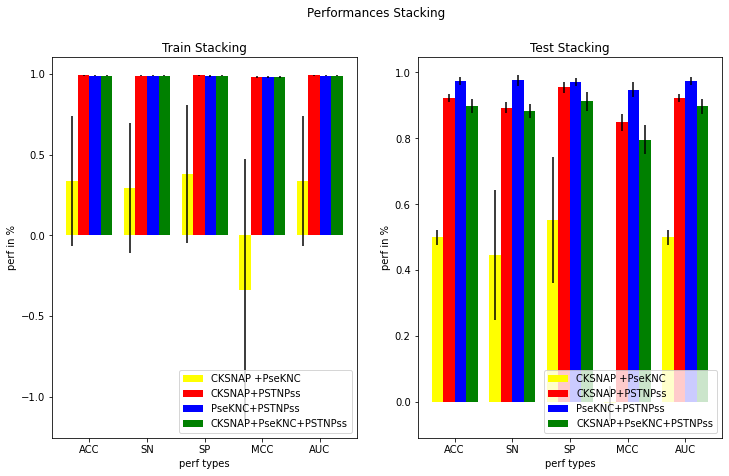

In [13]:
Plot_Performances_RNA_fusion(AB_tot_perf_train,AB_tot_perf_test, 'adaboost')
Plot_Performances_RNA_fusion(GB_tot_perf_train,GB_tot_perf_test, 'gradientboost')
Plot_Performances_RNA_fusion(RF_tot_perf_train,RF_tot_perf_test, 'random forest')
Plot_Performances_RNA_fusion(XGB_tot_perf_train,XGB_tot_perf_test, 'extreme gradient boost')
Plot_Performances_RNA_fusion(Stacking_tot_perf_train,Stacking_tot_perf_test, 'Stacking')